# Load Data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic_raw.csv')

Check how many examples and how many features are in the dataset

In [2]:
titanic.shape

(891, 12)

We have 891 examples and 12 columns (11 features and one label). Let's look at the data

In [4]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

Rename columns to lower letters

In [5]:
titanic = titanic.rename(columns=str.lower)

In [6]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

Label to numeric

In [7]:
titanic.survived = (titanic.survived=='Yes').astype('int')

Drop some features which aren't informative

In [9]:
titanic = titanic.drop(['passengerid','ticket','name'], axis=1)

In [10]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


Check for missing values

In [124]:
titanic.isna().mean()

survived    0.000000
pclass      0.000000
sex         0.000000
age         0.198653
sibsp       0.000000
parch       0.000000
fare        0.000000
cabin       0.771044
embarked    0.002245
dtype: float64

There are indeed missing values here, Cabin is actually almost always missing (77%), let's further check it

In [13]:
titanic.cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
F2             3
C22 C26        3
E101           3
D              3
E25            2
F4             2
C2             2
D36            2
D26            2
C93            2
C65            2
C83            2
E24            2
C52            2
E8             2
F G73          2
D20            2
E67            2
E44            2
B18            2
C124           2
E33            2
C92            2
D35            2
B22            2
B35            2
              ..
C46            1
B79            1
E50            1
A5             1
B39            1
B82 B84        1
D50            1
B42            1
E49            1
D28            1
A24            1
C95            1
C103           1
B37            1
C118           1
C49            1
A20            1
A36            1
D21            1
C101           1
B73            1
E17            1
A16            1
B102           1
C111           1
B30            1
D47            1
E46           

There are too many different values in this feature. Maybe we can use only the first letter as it's kind of like the area? Maybe the fact that some has NaN in the cabin means they acutally don't have a cabin?

In [126]:
first_letter_or_nan = titanic.cabin.str[0].fillna('Missing')
first_letter_or_nan.value_counts()

Missing    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: cabin, dtype: int64

This is better, but is it useful? Let's check the survival rate of passengers in these groups

In [127]:
titanic.groupby(first_letter_or_nan).survived.mean().sort_values()

cabin
T          0.000000
Missing    0.299854
A          0.466667
G          0.500000
C          0.593220
F          0.615385
B          0.744681
E          0.750000
D          0.757576
Name: survived, dtype: float64

Seems like when there is not cabin the survival rate drops significantly, the difference between the other categories is actually unclear. We can choose to create a new feature "has_cabin" instead of the previous "cabin" feature.

In [15]:
titanic['has_cabin'] = (titanic.cabin.isna()==False).astype(int)
titanic = titanic.drop(['cabin'], axis=1)

In [16]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,has_cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0
5,0,3,male,NaN,0,0,8.4583,Q,0
6,0,1,male,54.0,0,0,51.8625,S,1
7,0,3,male,2.0,3,1,21.0750,S,0
8,1,3,female,27.0,0,2,11.1333,S,0
9,1,2,female,14.0,1,0,30.0708,C,0


Categorical values to 1-hot

In [17]:
titanic = pd.get_dummies(titanic)
titanic.head(10)

,survived,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1
5,0,3,NaN,0,0,8.4583,0,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,1,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,0,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,0,1,0,1,0,0


Check all values are indeed numeric

In [18]:
titanic.dtypes

survived        int32
pclass          int64
age           float64
sibsp           int64
parch           int64
fare          float64
has_cabin       int32
sex_female      uint8
sex_male        uint8
embarked_C      uint8
embarked_Q      uint8
embarked_S      uint8
dtype: object

All features are numeric, perfect.

We still have missing values

In [136]:
titanic.isna().mean()

survived      0.000000
pclass        0.000000
age           0.198653
sibsp         0.000000
parch         0.000000
fare          0.000000
has_cabin     0.000000
sex_female    0.000000
sex_male      0.000000
embarked_C    0.000000
embarked_Q    0.000000
embarked_S    0.000000
dtype: float64

Let's use the median for the age

In [19]:
titanic.age = titanic.age.fillna(titanic.age.median())

In [20]:
titanic.isna().sum().sum()

0

No missing values!

# Finding interesting relationships

What is the label distibution

0    0.616162
1    0.383838
Name: survived, dtype: float64

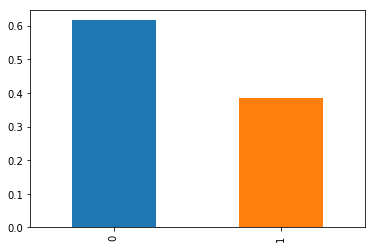

In [21]:
titanic.survived.value_counts(normalize=True).plot(kind='bar');
titanic.survived.value_counts(normalize=True)

only ~38% of the passangers survived

What are the statistics of the data?

In [144]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.228956,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the age column, we can see that the average age is 29.36, that the oldest passanger is 80 and that 25% of the passangers are 22 or younger. <br><br>
Looking at the survived column we can see again that only ~38% of the passangers survived by looking at the mean row <br><br>
Looking at the sex_female and sex_male columns we can see that ~65% of the passangers are men

Let's see what correlations are in the data

In [145]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.316912,0.543351,-0.543351,0.168240,0.003650,-0.155660
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.725541,-0.131900,0.131900,-0.243292,0.221009,0.081720
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.240314,-0.081163,0.081163,0.030248,-0.031415,-0.014665
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.040460,0.114631,-0.114631,-0.059528,-0.026354,0.070941
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.036987,0.245489,-0.245489,-0.011069,-0.081228,0.063036
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.482075,0.182333,-0.182333,0.269335,-0.117216,-0.166603
has_cabin,0.316912,-0.725541,0.240314,-0.040460,0.036987,0.482075,1.000000,0.140391,-0.140391,0.208528,-0.129572,-0.110087
sex_female,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,0.140391,1.000000,-1.000000,0.082853,0.074115,-0.125722
sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-0.140391,-1.000000,1.000000,-0.082853,-0.074115,0.125722
embarked_C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,0.208528,0.082853,-0.082853,1.000000,-0.148258,-0.778359


And now plot correlations to survived

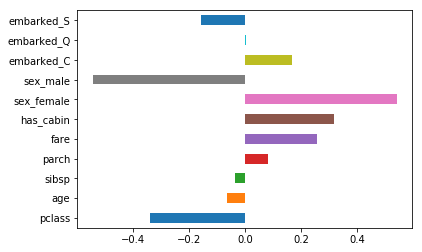

In [146]:
titanic.corr()['survived'].drop('survived').plot(kind='barh');

Some variables indeed have strong correlations, let's deep dive into pclass

In [148]:
titanic.pclass.head(10)

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: pclass, dtype: int64

What is the feature distribution?

In [150]:
pclass_distribution = titanic.pclass.value_counts(normalize=True).sort_index()
pclass_distribution

1    0.242424
2    0.206510
3    0.551066
Name: pclass, dtype: float64

What are the survival rates for each feature value?

In [152]:
survived_by_pclass_rates = titanic.groupby('pclass').survived.mean()
survived_by_pclass_rates

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

What does pclass actually mean? Looking at the [documentation](https://www.kaggle.com/c/titanic/data) we see that pclass is a proxy for the socio-economic class, 1=Upper, 2=Middle, 3=Lower

Let's plot it all into one graph

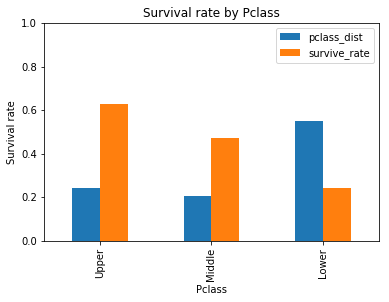

In [153]:
pclass_stats = pd.DataFrame({'pclass_dist':pclass_distribution, 'survive_rate':survived_by_pclass_rates})
pclass_stats.index = pclass_stats.index.map({1:'Upper', 2:'Middle', 3:'Lower'})
pclass_stats.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Survival rate')
plt.ylim(0, 1)
plt.title('Survival rate by Pclass');

So most passangers are of lower socio-economic class and they had a much lower survival rate, how surprising..

# Train and test split

Let's first convert all data to float because some modules warn against other types

In [164]:
titanic = titanic.astype(float)

We only have 891 examples, let's use 200 for test and the rest for train and split to inputs and labels

In [165]:
from sklearn.model_selection import train_test_split
test_size = 200
train, test = train_test_split(titanic, test_size=test_size, random_state=0, shuffle=True)
label = 'survived'
x_train, y_train = train.drop(label, axis=1), train[label]
x_test, y_test = test.drop(label, axis=1), test[label]

In [166]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((691, 11), (691,), (200, 11), (200,))

# Evaluation + Benchmark

As this is a classification problem that is pretty balanced in its labels, we can use accuracy as our evaluation metric

In [169]:
from sklearn.metrics import accuracy_score

The benchmark would be the most common label in the train set

In [170]:
y_train.value_counts()

0.0    424
1.0    267
Name: survived, dtype: int64

In this case it's 0 (not survived), let's check its performance on both train and test

In [171]:
import numpy as np
def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value

benchmark_value = 0

y_train_pred = get_benchmark_predictions(x_train, benchmark_value)
y_test_pred = get_benchmark_predictions(x_test, benchmark_value)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

(0.613603473227207, 0.625)

The performance on train and test is almost equal, 0.61 and 0.625, our best algorithm should beat the test performance

# Running KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

(0.8263386396526773, 0.73)

Already better than the benchmark, and seems like the algorithm overfits a bit, also we know that KNN can highly suffer from features that are in different scales. So let's scale the x values first

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

(0.8683068017366136, 0.8)

Even better performance!

# Running Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

(0.8118668596237337, 0.815)

Nice results!

# Feature Importance

Let's look at the random forest feature importance

In [175]:
feature_importances = clf.feature_importances_
features = x_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.head(10)

,feature,importance
0,pclass,0.117609
1,age,0.050579
2,sibsp,0.023350
3,parch,0.015040
4,fare,0.096426
5,has_cabin,0.064004
6,sex_female,0.315156
7,sex_male,0.295144
8,embarked_C,0.013368
9,embarked_Q,0.004730


Let's plot the top 10 most important features

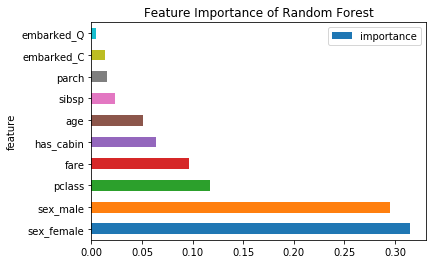

In [176]:
top_10 = stats.sort_values('importance', ascending=False).head(10)
top_10.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest');

This is pretty aligned with what we saw in the correlations, so seems like the algorithm found the right patterns

# Useful data preprocessing code

In [110]:
# Load data again
titanic_raw = pd.read_csv('titanic_raw.csv')
titanic_raw.Survived = (titanic_raw.Survived=='Yes').astype('int')

### Adding a column that indicate whether Cabin is missing

In [111]:
titanic_raw['Cabin_na'] = titanic_raw.Cabin.isna().astype('int')
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Showing distribution of a numerical variable

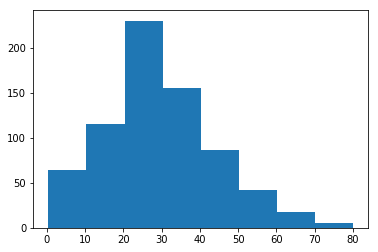

In [112]:
# Histogram with 8 bins
plt.hist(titanic_raw.Age, bins = 8);

### Grouping the long tail into a category

In order to illustrate this method, we will create a new feature called "Title" which is extracted from the passenger Names

In [113]:
titanic_raw['Title'] = titanic_raw.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_raw.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Capt          1
Mme           1
Jonkheer      1
Countess      1
Don           1
Lady          1
Sir           1
Name: Title, dtype: int64

There are many Title values here that barely appear in the dataset, it might be a good idea to merge them. We can for example say that 'Lady', 'Ms' would be merged into 'Miss', 'Major', 'Col','Capt' into 'Crew' and the evey value with less than 10 examples for it will be mapped to 'other'

In [114]:
# Mapping to Miss and Crew
titanic_raw['Title'] = titanic_raw['Title'].replace(['Lady', 'Ms'], 'Miss')
titanic_raw['Title'] = titanic_raw['Title'].replace(['Major', 'Col','Capt'], 'Crew')
counts = titanic_raw.Title.value_counts()
counts

Mr          517
Miss        184
Mrs         125
Master       40
Dr            7
Rev           6
Crew          5
Mlle          2
Jonkheer      1
Mme           1
Sir           1
Countess      1
Don           1
Name: Title, dtype: int64

In [115]:
# Mapping the rest
to_other = counts.index[counts<10]
to_other

Index(['Dr', 'Rev', 'Crew', 'Mlle', 'Jonkheer', 'Mme', 'Sir', 'Countess',
       'Don'],
      dtype='object')

In [116]:
titanic_raw['Title'] = titanic_raw['Title'].replace(to_other, 'Other')
titanic_raw.Title.value_counts()

Mr        517
Miss      184
Mrs       125
Master     40
Other      25
Name: Title, dtype: int64

### Group by a numerical value that is split into bins (ranges)

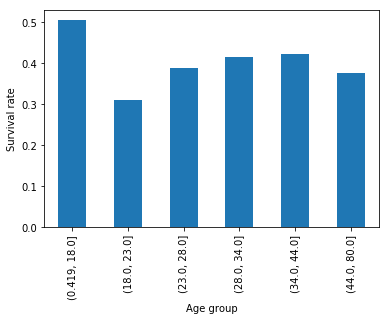

In [117]:
# Here we split the data into 5 bins of the same size
number_of_bins = 6
titanic_raw.groupby(pd.qcut(titanic_raw.Age, number_of_bins)).Survived.mean().plot.bar()
plt.ylabel('Survival rate')
plt.xlabel('Age group');

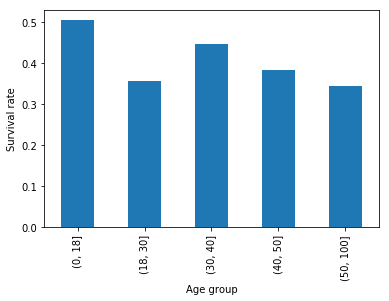

In [118]:
# We can also choose the bins ourselves by using pd.cut instead of pd.qcut
bins = [0, 18, 30, 40, 50, 100]
titanic_raw.groupby(pd.cut(titanic_raw.Age, bins)).Survived.mean().plot.bar()
plt.ylabel('Survival rate')
plt.xlabel('Age group');